This notebook generates examples of different degrees of uncertainty for the report.

In [23]:
import os
import numpy as np
import scipy.stats as sps
import scipy.optimize as so
import matplotlib.pyplot as plt
import matplotlib as mpl

#Matplotlib options to get Times face and LaTeX for the paper.
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times']

region_color='#bcd5e7'

In [15]:
x = np.linspace(0,1,11, endpoint=True)
y = x**2

loss = lambda theta: np.linalg.norm(theta*x - y)**2
mle = so.minimize( loss, 1).x

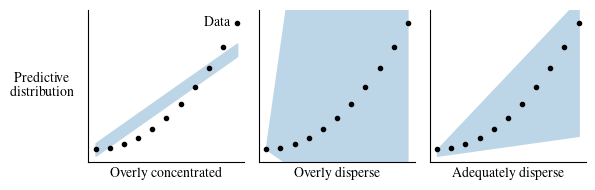

In [52]:

fig = plt.figure(figsize=(6,2))
axs = fig.subplots(1,3,sharey=True);


axs[0].fill_between(x, mle*x-0.05, mle*x+0.05, color=region_color)
axs[0].set_xlabel('Overly concentrated')
axs[0].set_ylabel('Predictive\ndistribution', ha='center', va='center', rotation=0)
axs[0].yaxis.set_label_coords(-.3, 0.5)
axs[0].annotate('Data', (0.95,1) ,ha='right', va='center')

axs[1].fill_between(x, mle*x*10, mle*x*-1, color=region_color)
axs[1].set_xlabel('Overly disperse')

axs[2].fill_between(x, mle*x*1.5, mle*x*.2-.05, color=region_color)
axs[2].set_xlabel('Adequately disperse')

for ax in axs:
    ax.plot(x,y,'k.')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines[['top','right']].set_visible(False)
    ax.set_ylim([-.1, 1.1])

fig.tight_layout()
fig.savefig('results/uq_definitions.pdf', bbox_inches='tight')